# 1. Error Function

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate
from scipy import special
from scipy.misc import derivative
import math

$$ erf(x) = \frac{2}{\sqrt{\pi}} \int_0^x e^{-t^2} dt. $$
위와 같이 주어지는 에러함수를 수치적분을 이용하여 구하고 그래프를 그려라. (어떤 방법을 이용하든 관계없음)
$$
\begin{align}
erf(x)= \frac{2}{\pi} \sum_{n=0}^{\infty} \frac{ (-1)^n x^{2n+1}} { (2n+1) n!}  \\
= \frac{2}{\pi} \left( x - \frac{x^3}{3} + \frac{x^5}{10} - \frac{x^7}{42} + \cdots \right)
\end{align}
$$
에러함수를 테일러 전개하면 위와 같이 주어진다. 위의 전개식과 적분결과를 그래프로 그리고 비교하여라.

0.9999779095030014

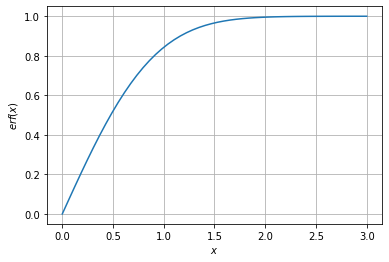

In [2]:
x = np.linspace(0, 3)
plt.plot(x, special.erf(x))
plt.xlabel('$x$')
plt.ylabel('$erf(x)$')
plt.grid()
special.erf(3)

In [4]:
def erf2(x):
    f = 0
    n = 0
    while n<170:
        a = (-1)**n
        b = x**(2*n+1)
        c = 2*n+1
        d = math.factorial(n)
        e = 2/(np.pi**(1/2))
        n = n+1
        f = f + ((a*b)/(c*d))*e
    return f
erf2(3)

0.9999779095030193

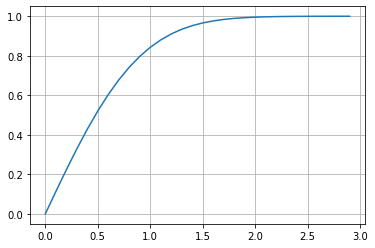

In [6]:
x = np.arange(0,3,0.1)
plt.plot(x,erf2(x))
plt.grid()

전개식과 적분결과의 그래프는 같은 모습을 보인다.

# 2. (Integration) Trigonometric Function
sin, cos함수를 trapezoidal 방법을 이용하여 직접 적분하고 그래프를 그려라.

sin, cos함수를 scipy.integrate 함수를 이용하여 적분하고 그래프를 그려라.

In [5]:
def sin(x):
    return np.sin(x)

def trapez1(f,a,b,n):
    s, x, dx = 0, a, (b-a)/n
    while(x<b):
        s += dx*(0.5*f(x)+0.5*f(x+dx))
        x = x + dx
    return s

trapez1(sin,0,2*np.pi,1000)

1.9739078809192488e-05

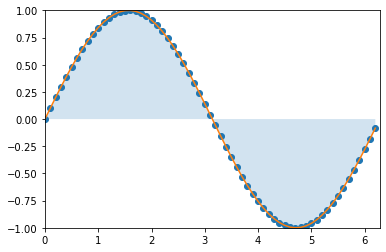

In [6]:
x = np.arange(0,2*np.pi,0.1)
plt.xlim(0,2*np.pi,0.1);plt.ylim(-1,1)
plt.plot(x,sin(x),'o');
plt.plot(x,sin(x));
plt.fill_between(x,sin(x),alpha=0.2)

In [7]:
def cos(x):
    return np.cos(x)

def trapez2(f,a,b,n):
    s, x, dx = 0, a, (b-a)/n
    while(x<b):
        s += dx*(0.5*f(x)+0.5*f(x+dx))
        x = x + dx
    return s

trapez2(cos,0,2*np.pi,1000)

0.006283123294775605

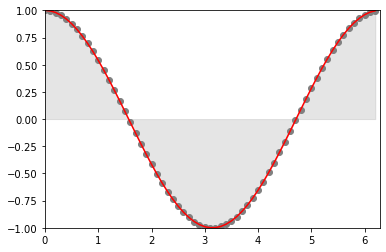

In [8]:
x = np.arange(0,2*np.pi,0.1)
plt.xlim(0,2*np.pi,0.1);plt.ylim(-1,1)
plt.plot(x,cos(x),'o',color='grey');
plt.plot(x,cos(x),color='red');
plt.fill_between(x,cos(x),alpha=0.2,color='grey')

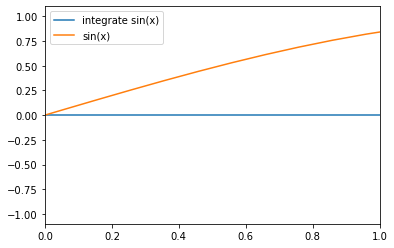

In [22]:
plt.plot(integrate.quad(np.sin,-2*np.pi,2*np.pi),label='integrate sin(x)')
x = np.arange(-np.pi,np.pi,0.1,)
plt.plot(x, np.sin(x),label='sin(x)')
plt.xlim(0,1,0.1)
plt.legend()

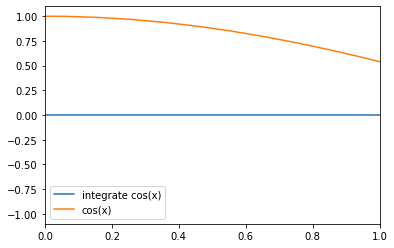

In [27]:
x = np.arange(-np.pi,np.pi,0.1)
plt.plot(integrate.quad(np.cos,0,2*np.pi),label='integrate cos(x)')
plt.plot(x, np.cos(x),label='cos(x)')
plt.xlim(0,1,0.1)
plt.legend()

# 3. (Differentiation) Trigonometric Function
sin, cos함수의 도함수를 finite difference 방법을 이용하여 구현하고 그래프를 그려라.

sin, cos함수의 도함수를 scipy.misc.derivative 함수를 이용하여 구하고 그래프를 그려라.

In [11]:
def sin(x):
    return np.sin(x)

def trapez1(f,a,b,n):
    s, x, dx = 0, a, (b-a)/n
    while(x<b):
        s += dx*(0.5*f(x)+0.5*f(x+dx))
        x = x + dx
    return s

In [12]:
def diff(f,x,dx):
    return (f(x+dx/2)-f(x-dx/2))/dx
dx=0.1
xdata=np.arange(-2*np.pi,2*np.pi,0.1)
diff=[diff(sin,i,dx) for i in xdata]

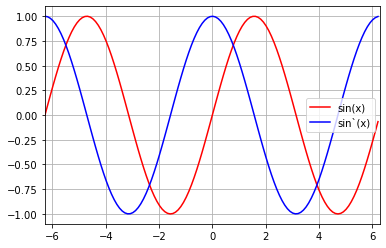

In [13]:
xdata = np.arange(-2*np.pi,2*np.pi,0.1)
plt.plot(xdata,sin(xdata),label='sin(x)',color='red')
plt.plot(xdata,diff, label='sin`(x)',color='blue')
plt.xlim(-2*np.pi,2*np.pi);plt.ylim(-1.1,1.1)
plt.grid()
plt.legend()

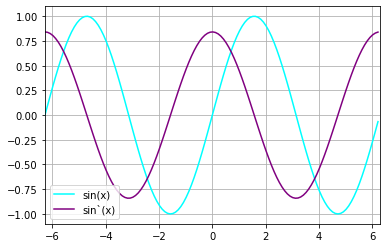

In [14]:
def sin(x):
    return np.sin(x)
def dsin(x):
    return derivative(sin, x)
xdata = np.arange(-2*np.pi,2*np.pi,0.1)
plt.plot(xdata,sin(xdata),color='cyan',label='sin(x)')
plt.plot(xdata,dsin(xdata),color='purple',label='sin`(x)')
plt.xlim(-2*np.pi,2*np.pi);plt.ylim(-1.1,1.1)
plt.grid()
plt.legend()

In [15]:
def cos(x):
    return np.cos(x)

def trapez2(f,a,b,n):
    s, x, dx = 0, a, (b-a)/n
    while(x<b):
        s += dx*(0.5*f(x)+0.5*f(x+dx))
        x = x + dx
    return s

In [16]:
def diff(f,x,dx):
    return (f(x+dx/2)-f(x-dx/2))/dx
dx=0.1
xdata=np.arange(-2*np.pi,2*np.pi,0.1)
diff=[diff(cos,i,dx) for i in xdata]

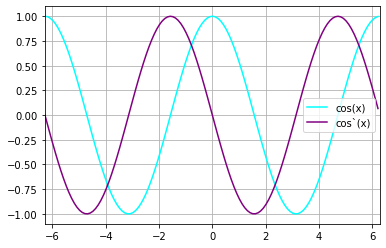

In [17]:
xdata = np.arange(-2*np.pi,2*np.pi,0.1)
plt.plot(xdata,cos(xdata), label='cos(x)',color='cyan')
plt.plot(xdata,diff, label='cos`(x)',color='purple')
plt.xlim(-2*np.pi,2*np.pi);plt.ylim(-1.1,1.1)
plt.grid()
plt.legend()

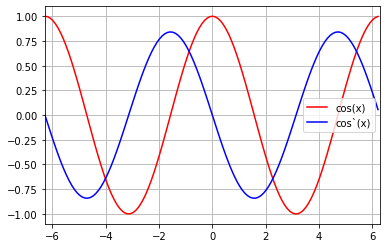

In [18]:
def cos(x):
    return np.cos(x)
def dcos(x):
    return derivative(np.cos, x)
xdata = np.arange(-2*np.pi,2*np.pi,0.1)
plt.plot(xdata,cos(xdata),color='red',label='cos(x)')
plt.plot(xdata,dcos(xdata),color='blue',label='cos`(x)')
plt.xlim(-2*np.pi,2*np.pi);plt.ylim(-1.1,1.1)
plt.grid()
plt.legend()

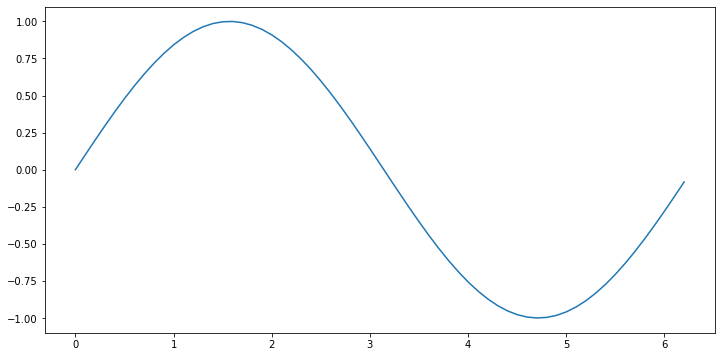

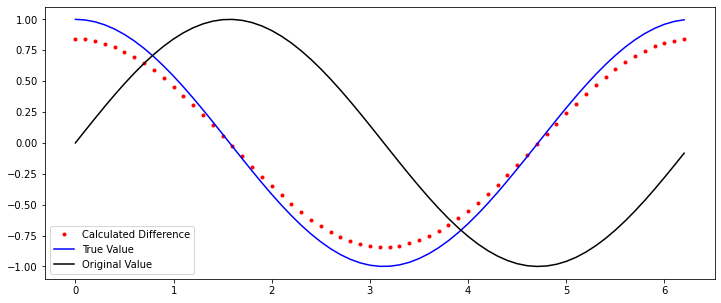

In [19]:
t = np.arange(0, 2*np.pi, 0.1)
y1 = np.sin(t)

plt.figure(figsize=(12,6))
plt.plot(t, y1);
dy1dx = derivative(np.sin, t)

plt.figure(figsize=(12,5))
plt.plot(t, dy1dx, 'r.', label='Calculated Difference')
plt.plot(t, np.cos(t), 'b', label='True Value')
plt.plot(t, y1, 'k', label='Original Value')
plt.legend(loc='best')
plt.show()

각각을 trapez를 통해 구했을 때는 정확한 결과가 나왔으나 scipy.misc.derivative를 사용했을 때는 오차가 발생하였다.

에러 함수 (-2) - 적분을 이용하여 구하지 않음

적분 (-3)